## importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

## loading book dataset

In [2]:
book = pd.read_csv("E:\\ExcelR\\Assingment\\Assignment 9\\book.csv")
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


## Apriori Algorithm

In [3]:
frequent_itemsets1 = apriori(book, min_support=0.1, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


## Association Rule

In [4]:
rule1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=0.7)
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


In [5]:
rule1.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [6]:
rule1[rule1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


## Visulaziation 

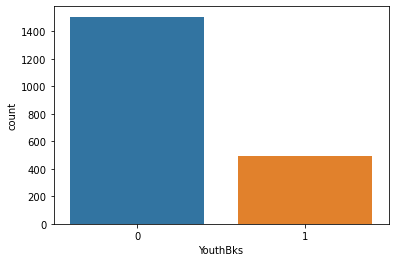

In [7]:
sns.countplot(book["YouthBks"])

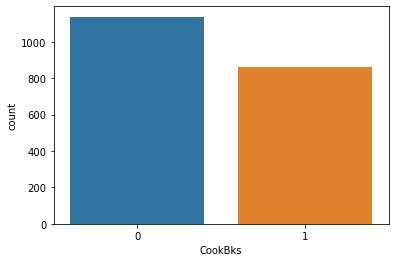

In [8]:
sns.countplot(book["CookBks"])

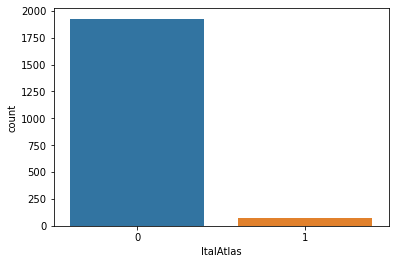

In [9]:
sns.countplot(book["ItalAtlas"])

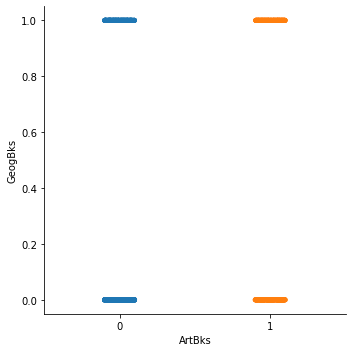

In [10]:
sns.catplot(x="ArtBks", y="GeogBks", data=book)

## loading my_movies dataset

In [11]:
movies = pd.read_csv("E:\\ExcelR\\Assingment\\Assignment 9\\my_movies.csv")
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


## creating dummies for our dataset

In [12]:
movies_dummy=pd.get_dummies(movies)
movies_dummy.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


## Apriori Algorithm

In [13]:
frequent_itemsets2 = apriori(movies_dummy, min_support=0.1, use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V4_Green Mile, V3_Harry Potter1, LOTR1, Green..."
1393,0.1,"(V4_Green Mile, V3_Harry Potter1, LOTR1, Green..."
1394,0.1,"(V4_Green Mile, V3_Harry Potter1, Green Mile, ..."
1395,0.1,"(V4_Green Mile, V3_Harry Potter1, LOTR1, Green..."


## Association Rule

In [15]:
rule2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=0.7)
rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
64247,(V1_Sixth Sense),"(V4_Green Mile, V3_Harry Potter1, LOTR1, Green...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(Sixth Sense),"(V4_Green Mile, V3_Harry Potter1, LOTR1, Green...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64249,(V5_LOTR2),"(V4_Green Mile, V3_Harry Potter1, LOTR1, Green...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64250,(V2_LOTR1),"(V4_Green Mile, V3_Harry Potter1, LOTR1, Green...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [16]:
rule2.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(V5_LOTR2, V3_Harry Potter1, LOTR2, Sixth Sense)","(Harry Potter1, LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33437,"(V5_LOTR2, Harry Potter1, Sixth Sense)","(V4_Green Mile, LOTR1, V2_LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(V4_Green Mile, V2_LOTR1, Sixth Sense)","(LOTR1, V5_LOTR2, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33416,"(V4_Green Mile, Harry Potter1, Sixth Sense)","(LOTR1, V5_LOTR2, V2_LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33417,"(V4_Green Mile, V5_LOTR2, V2_LOTR1)","(LOTR1, Harry Potter1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33418,"(V4_Green Mile, V5_LOTR2, Harry Potter1)","(LOTR1, V2_LOTR1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33419,"(V4_Green Mile, V2_LOTR1, Harry Potter1)","(LOTR1, V5_LOTR2, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33420,"(LOTR1, LOTR2, Sixth Sense)","(V4_Green Mile, V5_LOTR2, V2_LOTR1, Harry Pott...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33421,"(LOTR1, V5_LOTR2, LOTR2)","(V4_Green Mile, V2_LOTR1, Harry Potter1, Sixth...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33422,"(LOTR1, V2_LOTR1, LOTR2)","(V4_Green Mile, V5_LOTR2, Harry Potter1, Sixth...",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [17]:
rule2[rule2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64247,(V1_Sixth Sense),"(V4_Green Mile, V3_Harry Potter1, LOTR1, Green...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(Sixth Sense),"(V4_Green Mile, V3_Harry Potter1, LOTR1, Green...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64249,(V5_LOTR2),"(V4_Green Mile, V3_Harry Potter1, LOTR1, Green...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64250,(V2_LOTR1),"(V4_Green Mile, V3_Harry Potter1, LOTR1, Green...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


## Visulaziation

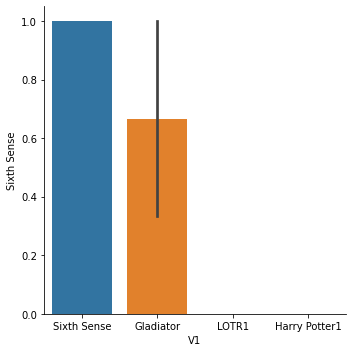

In [18]:
sns.catplot(x="V1", y="Sixth Sense", kind="bar", data = movies)

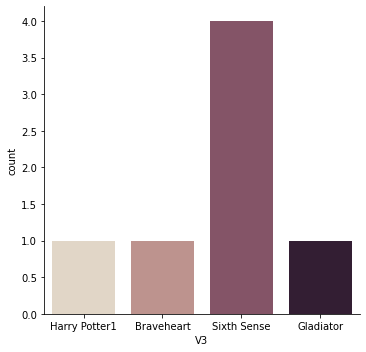

In [19]:
sns.catplot(x="V3", kind="count", palette="ch:.25", data=movies)

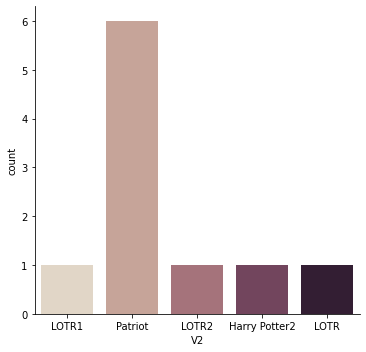

In [20]:
sns.catplot(x="V2", kind="count", palette="ch:.25", data=movies)

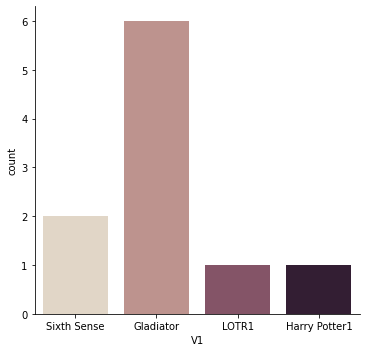

In [21]:
sns.catplot(x="V1", kind="count", palette="ch:.25", data=movies)

## Loading Groceries dataset

In [71]:
grc = pd.read_csv("E:\\ExcelR\\Assingment\\Assignment 9\\groceries.csv",sep='\t',header=None)
grc.head()

,0
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


In [73]:
grc.columns=['items']
grc

,items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."
...,...
9830,"sausage,chicken,beef,hamburger meat,citrus fru..."
9831,cooking chocolate
9832,"chicken,citrus fruit,other vegetables,butter,y..."
9833,"semi-finished bread,bottled water,soda,bottled..."


In [74]:
grc=list(grc["items"].apply(lambda x:x.split(',')))

In [75]:
te=TransactionEncoder()
te_data=te.fit(grc).transform(grc)
grc_df=pd.DataFrame(te_data,columns=te.columns_).astype(int)
grc_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Apriori Algorithm

In [76]:
frequent_itemsets3 = apriori(grc_df, min_support=0.05, use_colnames=True)
frequent_itemsets3

,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.082766,(citrus fruit)
7,0.058058,(coffee)
8,0.053279,(curd)
9,0.063447,(domestic eggs)


## Association Rules

In [77]:
rules3 = association_rules(frequent_itemsets3, metric="lift", min_threshold=1)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
3,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
4,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
5,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
